# Teste 3 - 02/10/2018

## Disponibilização: 26/09/2018 - 17h
## Encerramento: 02/10/2018 - 18h



- Manoel Victor Florencio de Souza
- Sérgio Alexandre Arruda Pinheiro

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import random

Populating the interactive namespace from numpy and matplotlib


# 1 Conjunto de Treinamento

In [2]:
X = np.array([[-1,0,0],[-1,0,1],[-1,1,0],[-1,1,1]])
X

array([[-1,  0,  0],
       [-1,  0,  1],
       [-1,  1,  0],
       [-1,  1,  1]])

In [3]:
y = np.array([1,1,1,0])

# 2 Neurônio Perceptron

In [4]:
W = np.array([round(random.uniform(-0.5, 0.5), 4) for i in range(3)])
W

array([ 0.3944,  0.1392, -0.0501])

In [5]:
def degree_function(x, W):
    return (1 if (np.dot(x,W) >= 0) else 0)

In [6]:
def update_weights(W, learning_rate, error, X):
    
    times_updated = 0
    
    for i in range(len(X)):
        if(error[i] != 0):
            W = W + learning_rate * error[i] * X[i]
            times_updated += 1
        
    return (W, times_updated)

In [7]:
def training_perceptron(W, X, y, activation_fuction):
    epoch = 0
    new_W = W
    total_times_updated = 0
    end = False

    while(not end):
        
        epoch += 1
        print("\nIncio da época {}".format(epoch))
        
        y_pred = [activation_fuction(X[i], new_W) for i in range(len(X))]
        print("Exemplos corretos: {}\nExemplos incorretos: {}".format(sum(y == y_pred), sum(y != y_pred)))
        print("Pesos:", new_W)
        
        if (sum(y == y_pred) != 4):
            new_W, update_per_epoch = update_weights(new_W, 0.1, y - y_pred, X)
            total_times_updated += update_per_epoch
        else:
            end = True

    print()
    print("Épocas até a convergência: ", epoch)
    print("Houveram {} ajustes no vetor de pesos".format(total_times_updated))
    
    return new_W

In [8]:
new_W = training_perceptron(W, X, y, degree_function)


Incio da época 1
Exemplos corretos: 1
Exemplos incorretos: 3
Pesos: [ 0.3944  0.1392 -0.0501]

Incio da época 2
Exemplos corretos: 1
Exemplos incorretos: 3
Pesos: [0.0944 0.2392 0.0499]

Incio da época 3
Exemplos corretos: 3
Exemplos incorretos: 1
Pesos: [-0.0056  0.1392  0.0499]

Incio da época 4
Exemplos corretos: 1
Exemplos incorretos: 3
Pesos: [ 0.0944  0.0392 -0.0501]

Incio da época 5
Exemplos corretos: 3
Exemplos incorretos: 1
Pesos: [-0.2056  0.1392  0.0499]

Incio da época 6
Exemplos corretos: 3
Exemplos incorretos: 1
Pesos: [-0.1056  0.0392 -0.0501]

Incio da época 7
Exemplos corretos: 2
Exemplos incorretos: 2
Pesos: [-0.0056 -0.0608 -0.1501]

Incio da época 8
Exemplos corretos: 3
Exemplos incorretos: 1
Pesos: [-0.2056  0.0392 -0.0501]

Incio da época 9
Exemplos corretos: 3
Exemplos incorretos: 1
Pesos: [-0.1056 -0.0608 -0.1501]

Incio da época 10
Exemplos corretos: 3
Exemplos incorretos: 1
Pesos: [-0.2056 -0.0608 -0.0501]

Incio da época 11
Exemplos corretos: 2
Exemplos inc

# 3 Visualizando a Fronteira de Decisão

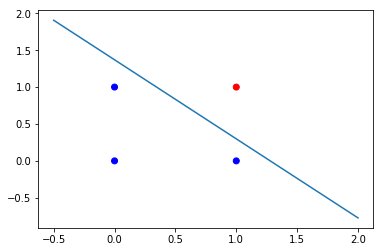

In [9]:
colormap = {1: 'b', 0: 'r'}
colors = [colormap[x] for x in y]

x = np.arange(-0.5, 2.5, 0.5)

plt.scatter(X.T[1], X.T[2], color=colors)
plt.plot(x, new_W[0]/new_W[2] - (new_W[1]/new_W[2]) * x)

# 4 Funções de Ativação

In [10]:
def make_values(n_samples):
    interval = 3/n_samples
    vals= np.array([-1.5])
    for i in range(n_samples):
        vals = np.append(vals, round(vals[-1]+interval,2))
    return vals

In [11]:
def degree_function_2(x):
    return (1 if (x >= 0.5) else 0)

def sigmoid_function(x):
    return (1 / (1 + np.exp(-x)))

def tamh_function(x):
    return np.tanh(x)

def relu_function(x):
    return max([0, x])

In [12]:
x_axe = make_values(10)
x_axe

array([-1.5, -1.2, -0.9, -0.6, -0.3,  0. ,  0.3,  0.6,  0.9,  1.2,  1.5])

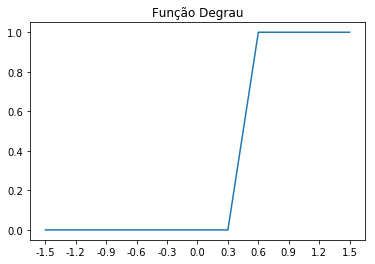

In [13]:
# Gráfico Degrau
vals = [degree_function_2(val) for val in x_axe]

plt.plot(vals)
plt.title("Função Degrau")
plt.xticks([i for i in range(0, len(x_axe))],x_axe)
plt.show()

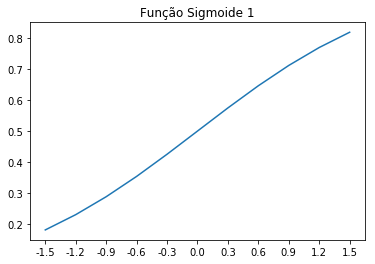

In [14]:
# Gráfico Sigmoide 1
vals = [sigmoid_function(val) for val in x_axe]

plt.plot(vals)
plt.title("Função Sigmoide 1")
plt.xticks([i for i in range(0, len(x_axe))],x_axe)
plt.show()

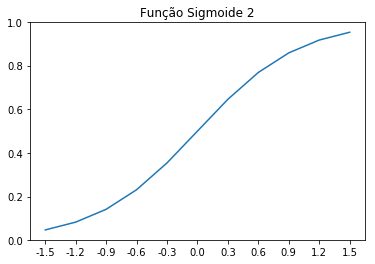

In [15]:
# Gráfico Sigmoide 2
vals = [sigmoid_function(val*2) for val in x_axe]

plt.plot(vals)
plt.title("Função Sigmoide 2")
plt.xticks([i for i in range(0, len(x_axe))],x_axe)
plt.show()

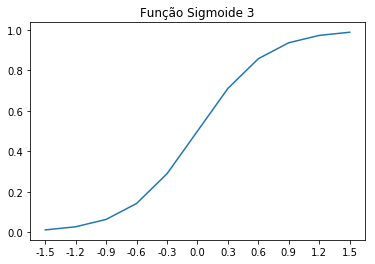

In [16]:
# Gráfico Sigmoide 3
vals = [sigmoid_function(val*3) for val in x_axe]

plt.plot(vals)
plt.title("Função Sigmoide 3")
plt.xticks([i for i in range(0, len(x_axe))],x_axe)
plt.show()

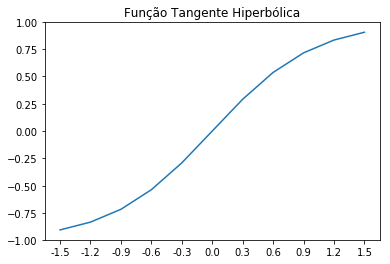

In [17]:
# Gráfico Tangente Hiperbólica
vals = [tamh_function(val) for val in x_axe]

plt.plot(vals)
plt.title("Função Tangente Hiperbólica")
plt.xticks([i for i in range(0, len(x_axe))],x_axe)
plt.show()

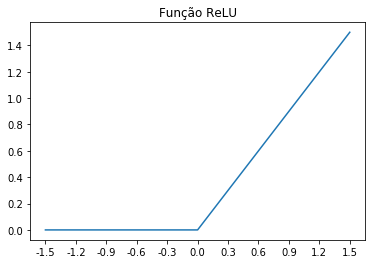

In [18]:
# Gráfico ReLU
vals = [relu_function(val) for val in x_axe]

plt.plot(vals)
plt.title("Função ReLU")
plt.xticks([i for i in range(0, len(x_axe))],x_axe)
plt.show()